**Supervised Machine Learning using LinearRegression**
In this regression task we have to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a very simple linear regression task as it involves just two variables i.e., hours and score.


In [170]:
#Import all required libraries for easy to understand
import pandas as pd
import numpy as np
#import the python libraries matplotlib and seaborn libraries is used for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [171]:
#reading the dataset in csv file into dataframed named "student_study"
student_study = pd.read_csv("http://bit.ly/w-data")

In [172]:
#Found out the view of dataset by head() functon whose defaul is set to 5 rows
student_study.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Exploratory Data Analysis**

In [173]:
#This info() function give the information of the columns datatypes.
student_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [174]:
#This ".shape" return the (number of rows, number of columns) in the dataset.
student_study.shape

(25, 2)

In [175]:
"""The isnull() function checks weather there is any null values in the dataset if any then it returns that respective column, 
in total to find out column having how many null values I have used sum() function"""
student_study.isnull().sum()

Hours     0
Scores    0
dtype: int64

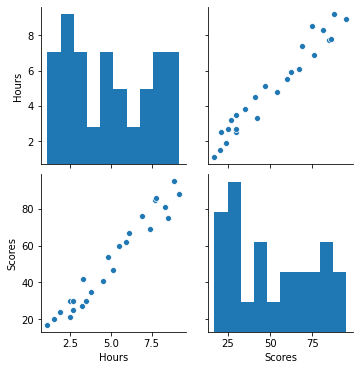

In [176]:

#using seaborn the below graphs is plot of relations between with each other
sns.pairplot(student_study)

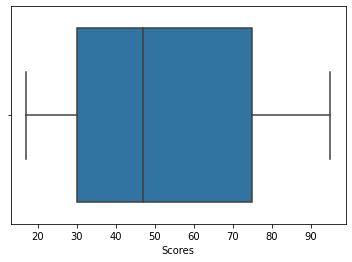

In [177]:
sns.boxplot(student_study["Scores"])

In [178]:
#the correlation function gives the correlation between the columns. values close to 1 will be considered in x.
student_study.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [179]:
X = student_study.iloc[:,:-1].values


In [180]:
y = student_study.iloc[:,1].values


In [181]:
#model for traning purpose
from sklearn.model_selection import train_test_split

In [200]:

#spliting the data into 80% traning data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 3)

**Applying ML Algorithm LinearRegression:**
Linear regression is a technique used to model the relationships between observed variables. The idea behind simple linear regression is to "fit" the observations of two variables into a linear relationship between them. Graphically, the task is to draw the line that is "best-fitting" or "closest" to the points are observations of the two variables which are expected to depend linearly on each other.

In [201]:
from sklearn.linear_model import LinearRegression

In [202]:
model = LinearRegression()

In [203]:
model.fit(X_train,y_train)
#traning model by giving traning data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

The coefficients, the residual sum of squares and the coefficient of determination are also calculated.

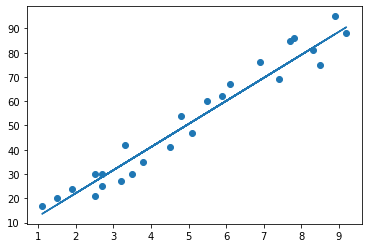

In [204]:
# Plotting the LinearRegression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [205]:
#predict() function used for predicting the values by taking parameter x_test
predict = model.predict(X_test)

In [206]:
#we can see how our model has predicted when compared to real values
predicted_data = pd.DataFrame({'Real': y_test, 'Predicted': predict})  
predicted_data

,Real,Predicted
0,67,61.072402
1,24,21.181131
2,41,45.875727
3,76,68.670739
4,95,87.666582


In [207]:
# task question
hour = [[9.25]]
Ownpredicted_value = model.predict(hour)
print("Predicted Score = {}".format(Ownpredicted_value[0]))

Predicted Score = 90.99085500040755


**r2 score** varies between 0 and 100%.proportion of the variance of dependent variable that is predictable from the independent variable. So, if it is close to 100%, the two variables are perfectly correlated.
**mean square error (MSE)** is the average of the square of the errors. The larger the number the larger is the error. Error in this case means the difference between the observed values and the predicted ones.
**variance** in terms of linear regression, variance is a measure of how far observed values differ from the average of predicted values, i.e., their difference from the predicted value mean. The goal is to have a value that is low.

In [208]:
from sklearn.metrics import r2_score,mean_squared_log_error,mean_squared_error,max_error,explained_variance_score, mean_absolute_error

print("r2 Score:", r2_score(y_test,predict))
print("mean squared log error:",mean_squared_log_error(y_test, predict))
print("mean squared error:", mean_squared_error(y_test, predict))
print("mean absolute error:", mean_absolute_error(y_test, predict))
print("max error:", max_error(y_test, predict))

print("variance score", explained_variance_score(y_test, predict))

r2 Score: 0.945261762833401
mean squared log error: 0.010202650231367643
mean squared error: 34.87044660461019
mean absolute error: 5.656974488548368
max error: 7.333417556443052
variance score 0.9668294864502207
